In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona
import statistics

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from os import listdir
from os.path import isfile, join

In [2]:
mypath = '../results/p6/CO2/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
allfiles = []
for i in range(len(onlyfiles)):
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=',', decimal='.')
    allfiles.append(df)

In [4]:
allfiles = []
for i in range(len(onlyfiles)):
    if onlyfiles[i].startswith('s_'):
        continue
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=',', decimal='.')
    allfiles.append(df.iloc[:,1:3])

In [5]:
coeff = pd.concat(allfiles)
coeff.columns = ['infrastructure', 'coefficient']
coeff = coeff.replace('Feat_','',regex=True)

In [6]:
mypath = '../results/p6/CO2/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
allfiles = []
for i in range(len(onlyfiles)):
    if onlyfiles[i].startswith('s_'):
        continue
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=',', decimal='.').iloc[:,1:3]
    df.columns = ['infrastructure', 'coefficient']
    print(onlyfiles[i],'--->',max(df[df['infrastructure']=='Feat_Road_immission']['coefficient']))

platoon_6_0.csv ---> 1.6659
platoon_6_1.csv ---> -0.4847
platoon_6_2.csv ---> 4.5274
platoon_6_4.csv ---> 1.2422


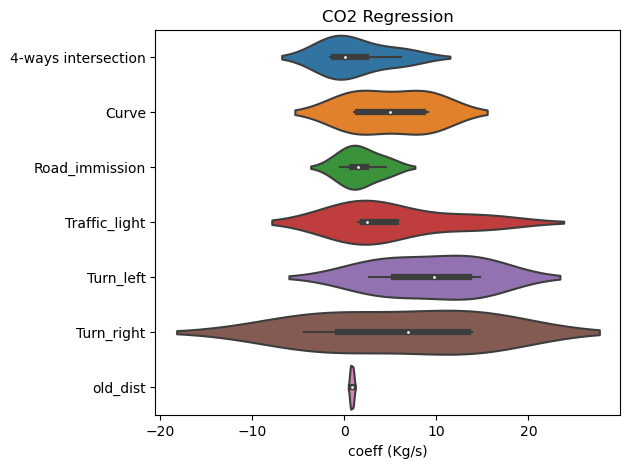

In [7]:
figure(figsize=(6, 5), dpi=100)
fig = sns.violinplot(data=coeff, x="coefficient", y="infrastructure", scale="count")
fig.set(ylabel=None)
plt.title('CO2 Regression')
plt.xlabel('coeff (Kg/s)')
plt.savefig('../figure/coeff_co2.pdf',bbox_inches='tight')
plt.show()


In [8]:
#coef_avg = pd.concat([allfiles[0].iloc[:,0], pd.concat(allfiles, axis=1).iloc[:,[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]].mean(axis=1)], axis=1)
#coef_avg.columns = ['infrastructure', 'avg_coeff']
#coef_avg.to_csv('coef_avg_CO2.csv', index=False)

In [16]:
mypath = '../results/p6/Dist/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
allfiles = []
for i in range(len(onlyfiles)):
    if onlyfiles[i].startswith('s_'):
        continue
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=',', decimal='.').iloc[:,1:3]
    df.columns = ['infrastructure', 'coefficient']
    print(onlyfiles[i],'--->',min(df[df['infrastructure']=='Feat_Turn_right']['coefficient']))

platoon_6_0.csv ---> 0.5417
platoon_6_1.csv ---> 13.3456
platoon_6_2.csv ---> -4.3136
platoon_6_4.csv ---> 13.8288


In [10]:

mypath = '../results/p6/Dist/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
allfiles = []
for i in range(len(onlyfiles)):
    if onlyfiles[i].startswith('s_'):
        continue
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=',', decimal='.')
    allfiles.append(df.iloc[:,1:3])
coeff2 = pd.concat(allfiles)
coeff2.columns = ['infrastructure', 'coefficient']
coeff2 = coeff2.replace('Feat_','',regex=True)
coeff2

,infrastructure,coefficient
0,4-ways intersection,-0.9247
1,Curve,8.4330
2,Road_immission,1.6659
3,Traffic_light,1.5110
4,Turn_left,2.6502
5,Turn_right,0.5417
6,old_dist,0.7043
0,4-ways intersection,1.0887
1,Curve,9.0511
2,Road_immission,-0.4847


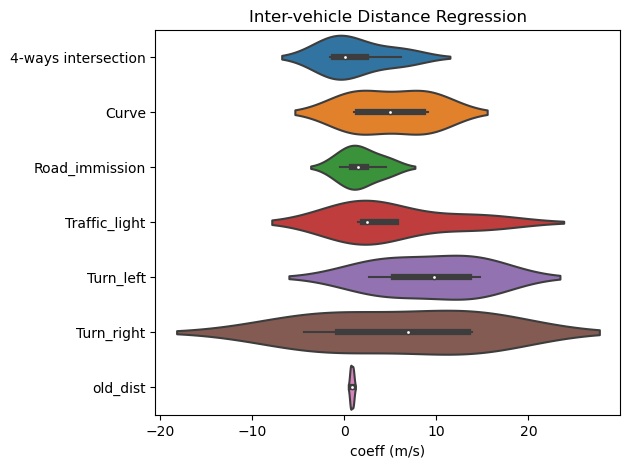

In [11]:
figure(figsize=(6, 5), dpi=100)
fig = sns.violinplot(data=coeff2, x="coefficient", y="infrastructure", scale="count")
fig.set(ylabel=None)
plt.title('Inter-vehicle Distance Regression')
plt.xlabel('coeff (m/s)')
#plt.xlim([-15,50])
plt.savefig('../figure/coeff_dist.pdf',bbox_inches='tight')
plt.show()


In [12]:
avg_co2_cooeff = coeff.groupby(['infrastructure'])[['coefficient']].mean().reset_index()
avg_ivd_cooeff = coeff2.groupby(['infrastructure'])[['coefficient']].mean().reset_index()
avg_coeff = pd.concat([avg_co2_cooeff,avg_ivd_cooeff],axis=1)
avg_coeff.columns = ['road_f','avg_co2_coeff','dummy','avg_ivd_coeff']
avg_coeff = avg_coeff[['road_f','avg_ivd_coeff','avg_co2_coeff']]
print(avg_coeff.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
             road\_f &  avg\_ivd\_coeff &  avg\_co2\_coeff \\
\midrule
4-ways intersection &       1.216650 &       1.216650 \\
              Curve &       5.053325 &       5.053325 \\
     Road\_immission &       1.737700 &       1.737700 \\
      Traffic\_light &       5.219500 &       5.219500 \\
          Turn\_left &       9.236750 &       9.236750 \\
         Turn\_right &       5.850625 &       5.850625 \\
           old\_dist &       0.828000 &       0.828000 \\
\bottomrule
\end{tabular}



C:\Users\marco\AppData\Local\Temp\ipykernel_16220\1249744023.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(avg_coeff.to_latex(index=False))


In [13]:

for index,row in avg_coeff.iterrows():
    print(row['road_f'].lower().replace('4-ways intersection','four_way'),'=',row['avg_ivd_coeff'],',')

four_way = 1.21665 ,
curve = 5.053325 ,
road_immission = 1.7377000000000002 ,
traffic_light = 5.2195 ,
turn_left = 9.23675 ,
turn_right = 5.850625 ,
old_dist = 0.8280000000000001 ,


In [14]:
for index,row in avg_coeff.iterrows():
    print(row['road_f'].lower().replace('4-ways intersection','four_way'),'=',row['avg_co2_coeff'],',')

four_way = 1.21665 ,
curve = 5.053325 ,
road_immission = 1.7377000000000002 ,
traffic_light = 5.2195 ,
turn_left = 9.23675 ,
turn_right = 5.850625 ,
old_dist = 0.8280000000000001 ,
